In [10]:
from Lrp_utils import DeepNN, LRPDropout
from lrp import train_model,test_model

In [11]:
from lrp import train_modellrp

In [12]:
import copy
import torch.nn as nn
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt

In [13]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and Prepare the MNIST Dataset
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
full_train_data = MNIST(root='data', train=True, download=True, transform=transform)
test_data = MNIST(root='data', train=False, download=True, transform=transform)

# Split full training data into training and validation
train_size = int(0.8 * len(full_train_data))
valid_size = len(full_train_data) - train_size
train_data, valid_data = random_split(full_train_data, [train_size, valid_size])

# Create data loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


In [15]:
# Initialize the network
model = DeepNN()

# Step 3: Define the Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
if train_on_gpu:
  model.cuda()

Epoch 1/2 	 Training Loss: 0.4847 	 Validation Loss: 0.2045
Epoch 2/2 	 Training Loss: 0.2316 	 Validation Loss: 0.1693


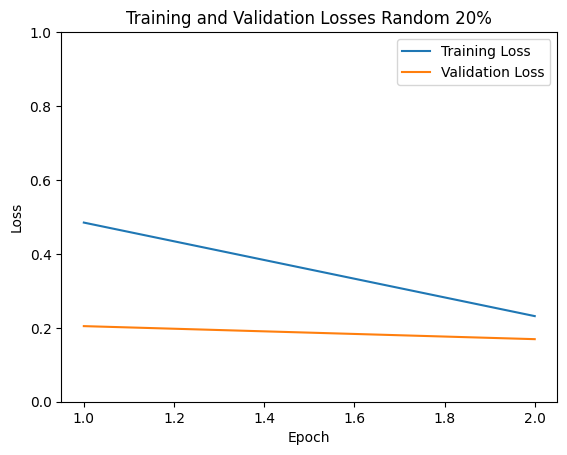

Test Loss: 0.1627, Test Accuracy: 94.90%


In [16]:
# Run the training and testing
num_epochs = 2
valid_losses=train_model(model,num_epochs,train_loader,train_on_gpu,optimizer,criterion,valid_loader)
test_model(model,test_loader,criterion, train_on_gpu)

Epoch 1/2 	 Training Loss: 0.8223 	 Validation Loss: 0.6545
Epoch 2/2 	 Training Loss: 0.6681 	 Validation Loss: 0.6817


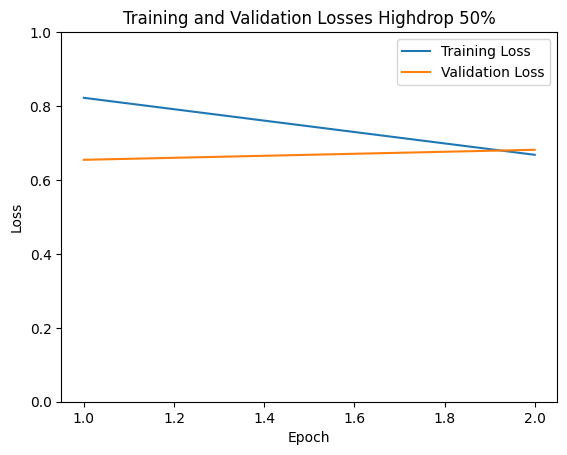

In [17]:
class DeepNN_LRP(nn.Module,):
    def __init__(self):
        super(DeepNN_LRP, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.dropout1= LRPDropout(0.5)
        # self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(512, 128)
        self.dropout2= LRPDropout(0.5)
        self.fc4 = nn.Linear(128, 64)
        self.dropout3= LRPDropout(0.5)
        self.fc5 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the images
        x = self.dropout1(F.relu(self.fc1(x)))
        # x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout2(F.relu(self.fc3(x)))
        x = self.dropout3(F.relu(self.fc4(x)))
        x = self.fc5(x)
        return x

modellrp = DeepNN_LRP()

# Step 3: Define the Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modellrp.parameters(), lr=0.001)

if train_on_gpu:
  modellrp.cuda()

# Run the training and testing
num_epochs = 2
train_modellrp(modellrp,num_epochs,train_loader,valid_loader,train_on_gpu,optimizer,criterion)

In [18]:
test_model(modellrp, test_loader,criterion, train_on_gpu)

Test Loss: 0.6591, Test Accuracy: 78.89%
